In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

In [3]:
month_box_data = '../Month/Merge_Date.csv'
month_box = pd.read_csv(month_box_data, parse_dates=True)
month_box.head()

,Unnamed: 0,Movie,Box Office,Release Date_x,Award_date,Release Year,Release Month
0,0,Capote,28337516.0,2005-09-30,2006-03-05,2005.0,9.0
1,1,American Hustle,99165609.0,2013-12-12,2014-03-02,2013.0,12.0
2,2,Brokeback Mountain,82970165.0,2005-09-10,2006-03-05,2005.0,9.0
3,3,Walk the Line,119317827.0,2005-09-13,2006-03-05,2005.0,9.0
4,4,"Good Night, and Good Luck.",31500000.0,2005-09-16,2006-03-05,2005.0,9.0


In [4]:
#categorize ranges of days
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_box['Release Month'] = pd.cut(month_box['Release Month'], bins=bins, labels=labels)
month_box.head()

,Unnamed: 0,Movie,Box Office,Release Date_x,Award_date,Release Year,Release Month
0,0,Capote,28337516.0,2005-09-30,2006-03-05,2005.0,Sep
1,1,American Hustle,99165609.0,2013-12-12,2014-03-02,2013.0,Dec
2,2,Brokeback Mountain,82970165.0,2005-09-10,2006-03-05,2005.0,Sep
3,3,Walk the Line,119317827.0,2005-09-13,2006-03-05,2005.0,Sep
4,4,"Good Night, and Good Luck.",31500000.0,2005-09-16,2006-03-05,2005.0,Sep


In [19]:
month_box_df = month_box.groupby('Release Month')["Box Office"].sum().reset_index()
month_box_df

,Release Month,Box Office
0,Jan,205194025.00
1,Feb,378496930.00
2,Mar,1362285740.00
3,Apr,1724167388.00
4,May,2570269960.00
5,Jun,4956045867.00
6,July,2464779190.00
7,Aug,1339978581.00
8,Sep,1914875245.00
9,Oct,2298415764.00


In [20]:
month_box_df['Box Office'] = month_box_df['Box Office'] / 1000000000  #cover to Billion
month_box_df

,Release Month,Box Office
0,Jan,0.21
1,Feb,0.38
2,Mar,1.36
3,Apr,1.72
4,May,2.57
5,Jun,4.96
6,July,2.46
7,Aug,1.34
8,Sep,1.91
9,Oct,2.30


In [9]:
#x = ['Box Office']
#def convert_si_to_number(x):
 #   total_stars = 0
  #  if 'M' in x:
   #     if len(x) > 1:
    #        total_stars = float(x.replace('M', '')) * 100000 # convert M to a Million
    #elif 'B' in x:
     #   if len(x) > 1:
      #      total_stars = float(x.replace('B', '')) * 1000000000 # convert B to a Billion
    #elif 'T' in x:
     #   total_stars = float(x.replace('T', '')) * 1000000000000 # convert T to a Trillion
    #else:
     #   total_stars = int(x) # Less than 1000
    
    #return int(total_stars)

<IPython.core.display.Javascript object>


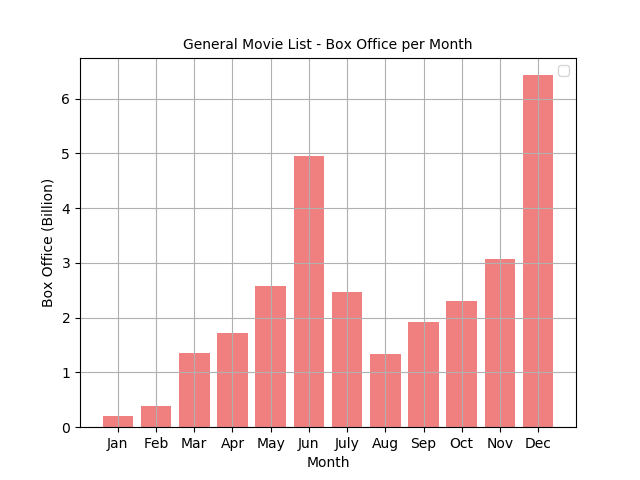

<BarContainer object of 12 artists>

In [35]:
plt.bar(month_box_df['Release Month'],month_box_df['Box Office'], color='lightcoral', align="center")

In [22]:
plt.xlim(-0.75, len(month_box_df['Release Month'])-0.25)

(-0.75, 11.75)

In [38]:
plt.grid()
plt.title('General Movie List - Box Office per Month', fontsize=10)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Box Office (Billion)', fontsize=10)

Text(55.8472,0.5,'Box Office (Billion)')

In [40]:
# Save Figure
plt.savefig("../Month/box_month.png")